## BRITISH AIRWAYS ANALYSIS

The project aims to get insights on the service delivery of the British Airways so that the airline can get an understanding of it's level of performance in terms of  customer satisfaction and service delivery so that it can  improve and uphold  the airline of choice status amongst other airline operators. Some of the areas of focus include customer satisfaction, flight experience, food and beverages, inflight entertainment, ground service, value for money, recommendations, trends over time, frequent comments.

I extracted the dataset from Kaggle 

### Importing libraries

In [486]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
matplotlib.rcParams['figure.figsize']= (15,6)
%matplotlib inline




### Loading Data 

In [488]:
#loading data
df = pd.read_csv("british_airways_review.csv")

df.replace(['np.inf', '-np.inf'], 'np.nan', inplace=True)

## Data Exploration

In [490]:
df.head()

,main_text,user,text_content,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity
0,"""happy to recommend BA""",Caleb Lowe (United Kingdom) 18th June 2024,"✅ Trip Verified | Four very pleasant, on time...",A320/A380,Couple Leisure,Business Class,Belfast to San Francisco via London,April 2024,5.0,5.0,3.0,3.0,5.0,4,yes,NaN
1,"""cancelled our return flight""",N Thomas (United Kingdom) 18th June 2024,"✅ Trip Verified | Four very pleasant, on time...",NaN,Couple Leisure,Economy Class,London Heathrow to Keflavik,June 2024,2.0,3.0,1.0,NaN,3.0,2,no,NaN
2,"""Very good experience all round""",28 reviews\n\n\n\nN Carter (United Kingdom) 17...,"✅ Trip Verified | Four very pleasant, on time...",Boeing 777,Solo Leisure,Business Class,New York JFK to London Heathrow,June 2024,5.0,5.0,4.0,3.0,1.0,2,yes,NaN
3,"""inflight service was efficient and friendly""",28 reviews\n\n\n\nN Carter (United Kingdom) 17...,"✅ Trip Verified | Four very pleasant, on time...",Boeing 777,Solo Leisure,Premium Economy,London to newark,June 2024,4.0,4.0,4.0,3.0,4.0,3,yes,NaN
4,“worst airline I’ve ever flown”,H Miller (United States) 16th June 2024,"✅ Trip Verified | Four very pleasant, on time...",NaN,Couple Leisure,Economy Class,Florence to Heathrow,June 2024,1.0,3.0,2.0,NaN,1.0,1,no,NaN


In [491]:
#correcting the column names 
df.columns = df.columns.str.replace(' ', '_')

In [492]:
df.shape

(3815, 16)

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   main_text               3815 non-null   object 
 1   user                    3815 non-null   object 
 2   text_content            3815 non-null   object 
 3   Aircraft                1990 non-null   object 
 4   Type_Of_Traveller       3044 non-null   object 
 5   Seat_Type               3813 non-null   object 
 6   Route                   3040 non-null   object 
 7   Date_Flown              3037 non-null   object 
 8   Seat_Comfort            3693 non-null   float64
 9   Cabin_Staff_Service     3680 non-null   float64
 10  Food_&_Beverages        3403 non-null   float64
 11  Inflight_Entertainment  2621 non-null   float64
 12  Ground_Service          2967 non-null   float64
 13  Value_For_Money         3815 non-null   int64  
 14  Recommended             3815 non-null   

In [494]:
#checking missing values
mask_missing = df.isnull().sum().sort_values(ascending = False)
mask_missing_percent = df.isnull().sum().sort_values(ascending = False)* 100/df.shape[0]
missing_values = pd.concat([mask_missing, mask_missing_percent], axis = 1, keys= ['number', 'percentage'])
missing_values

,number,percentage
Wifi_&_Connectivity,3164,82.935780
Aircraft,1825,47.837484
Inflight_Entertainment,1194,31.297510
Ground_Service,848,22.228047
Date_Flown,778,20.393185
Route,775,20.314548
Type_Of_Traveller,771,20.209699
Food_&_Beverages,412,10.799476
Cabin_Staff_Service,135,3.538663
Seat_Comfort,122,3.197903


**I am dropping the  wifi_&_connectivity and  aircraft columns because they have more than 50%   missing values so they are not giving me much information**

In [496]:
#dropping columns 
df.drop(columns = ['Wifi_&_Connectivity', 'Aircraft'] , inplace = True)
df.columns

Index(['main_text', 'user', 'text_content', 'Type_Of_Traveller', 'Seat_Type',
       'Route', 'Date_Flown', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Food_&_Beverages', 'Inflight_Entertainment', 'Ground_Service',
       'Value_For_Money', 'Recommended'],
      dtype='object')

In [497]:
#checking duplicated values
df.duplicated().sum()

3

In [498]:
df.drop_duplicates(inplace = True)

In [499]:
df.dropna(inplace  = True)

In [500]:
df.shape

(1817, 14)

In [501]:
#statistics
df.describe()

,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,2.821134,3.205283,2.619703,2.663731,2.900936,2.632361
std,1.372092,1.471542,1.426661,1.379431,1.426652,1.425541
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1817 entries, 0 to 3033
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   main_text               1817 non-null   object 
 1   user                    1817 non-null   object 
 2   text_content            1817 non-null   object 
 3   Type_Of_Traveller       1817 non-null   object 
 4   Seat_Type               1817 non-null   object 
 5   Route                   1817 non-null   object 
 6   Date_Flown              1817 non-null   object 
 7   Seat_Comfort            1817 non-null   float64
 8   Cabin_Staff_Service     1817 non-null   float64
 9   Food_&_Beverages        1817 non-null   float64
 10  Inflight_Entertainment  1817 non-null   float64
 11  Ground_Service          1817 non-null   float64
 12  Value_For_Money         1817 non-null   int64  
 13  Recommended             1817 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usa

In [609]:
#changing Date Flown  to datetime 
df['Date_Flown'] =  pd.to_datetime(df['Date_Flown'])

**To get the overall satisifaction I will create a new column and called overall rating column which shows the satisfaction of each user/customer on all the services provided.**

In [505]:
# creating the overall rating column by using the average of all the ratings 
df['overall_rating'] = np.mean( df[['Seat_Comfort' 
                         ,'Cabin_Staff_Service'
                         , 'Food_&_Beverages'
                         ,'Inflight_Entertainment'
                         , 'Ground_Service'
                         , 'Value_For_Money']], axis = 1).round(2)
df['overall_rating']


0       4.17
2       3.33
3       3.67
9       2.67
10      1.00
        ... 
3024    4.33
3026    3.67
3028    3.33
3031    3.83
3033    1.83
Name: overall_rating, Length: 1817, dtype: float64

In [506]:
df.head(2)

,main_text,user,text_content,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""happy to recommend BA""",Caleb Lowe (United Kingdom) 18th June 2024,"✅ Trip Verified | Four very pleasant, on time...",Couple Leisure,Business Class,Belfast to San Francisco via London,2024-04-01,5.0,5.0,3.0,3.0,5.0,4,yes,4.17
2,"""Very good experience all round""",28 reviews\n\n\n\nN Carter (United Kingdom) 17...,"✅ Trip Verified | Four very pleasant, on time...",Solo Leisure,Business Class,New York JFK to London Heathrow,2024-06-01,5.0,5.0,4.0,3.0,1.0,2,yes,3.33


**The data is ready for analysis**

In [508]:
df.head(2)

,main_text,user,text_content,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_&_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,overall_rating
0,"""happy to recommend BA""",Caleb Lowe (United Kingdom) 18th June 2024,"✅ Trip Verified | Four very pleasant, on time...",Couple Leisure,Business Class,Belfast to San Francisco via London,2024-04-01,5.0,5.0,3.0,3.0,5.0,4,yes,4.17
2,"""Very good experience all round""",28 reviews\n\n\n\nN Carter (United Kingdom) 17...,"✅ Trip Verified | Four very pleasant, on time...",Solo Leisure,Business Class,New York JFK to London Heathrow,2024-06-01,5.0,5.0,4.0,3.0,1.0,2,yes,3.33


## Data Analysis

#### Flight Experience:
##### o	How do different types of travelers (e.g., solo, couple, business) rate their overall flight experience?


In [511]:
#calculating average rating by travelers
Travellers_experience = df.groupby("Type_Of_Traveller")['overall_rating'].mean().round(0).sort_values(ascending = False);


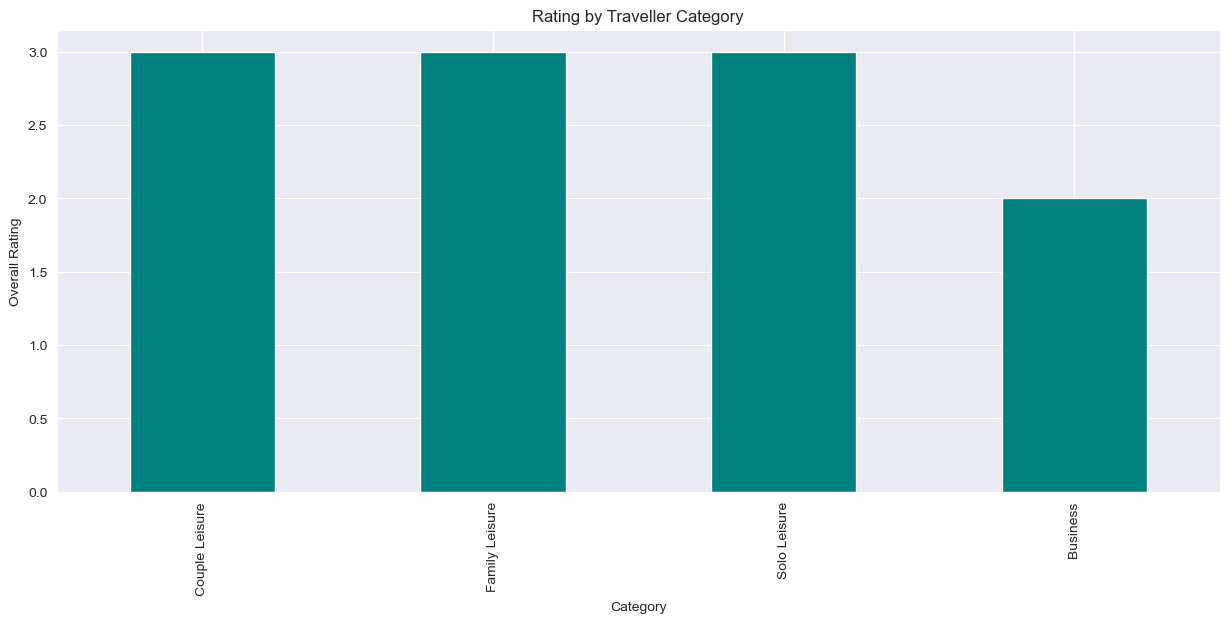

In [512]:
#visualizing the outcome

Travellers_experience.plot(kind = 'bar', color = 'teal')
plt.xlabel("Category")
plt.ylabel("Overall Rating")
plt.title('Rating by Traveller Category')
sns.set_style('darkgrid');

**Couple Leisure, Family Leisure and Solo Leisure have ratings around 3 and Business has a poor rating of 2.**

##### o	How do seat comfort and cabin staff service ratings correlate with overall satisfaction?


In [515]:
corr_matrix =  df[['Seat_Comfort', 'Cabin_Staff_Service', 'overall_rating']].corr()

corr_matrix

,Seat_Comfort,Cabin_Staff_Service,overall_rating
Seat_Comfort,1.000000,0.588468,0.820379
Cabin_Staff_Service,0.588468,1.000000,0.816548
overall_rating,0.820379,0.816548,1.000000


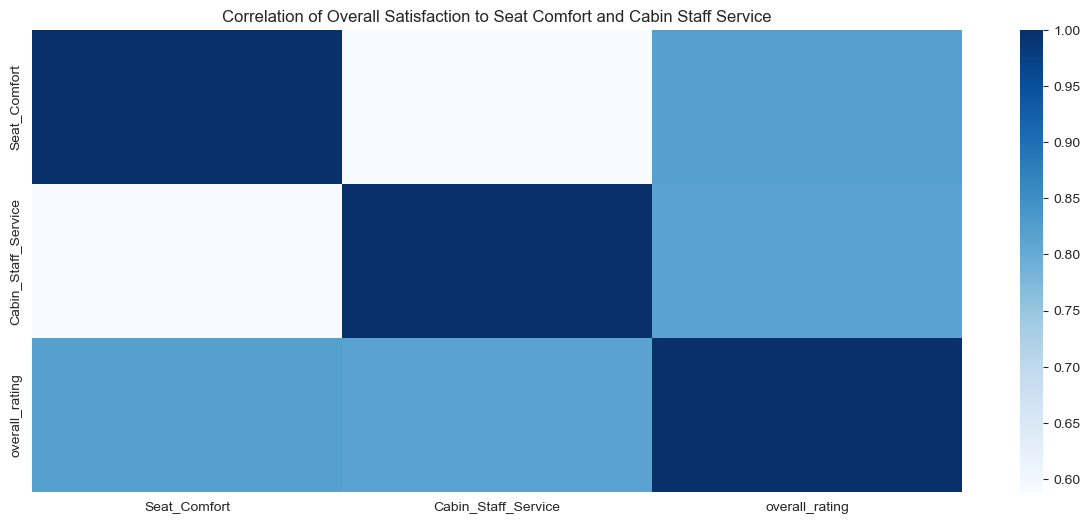

In [584]:
#visualizing the outcome
sns.heatmap(corr_matrix , cmap = 'Blues')
plt.title('Correlation of Overall Satisfaction to Seat Comfort and Cabin Staff Service');

**Seat comfort and Cabin Staff service have a  positive correlation with overall rating of around 0.8**

### 3. Food and Beverages:
##### o	What is the average rating for food and beverages on different routes?


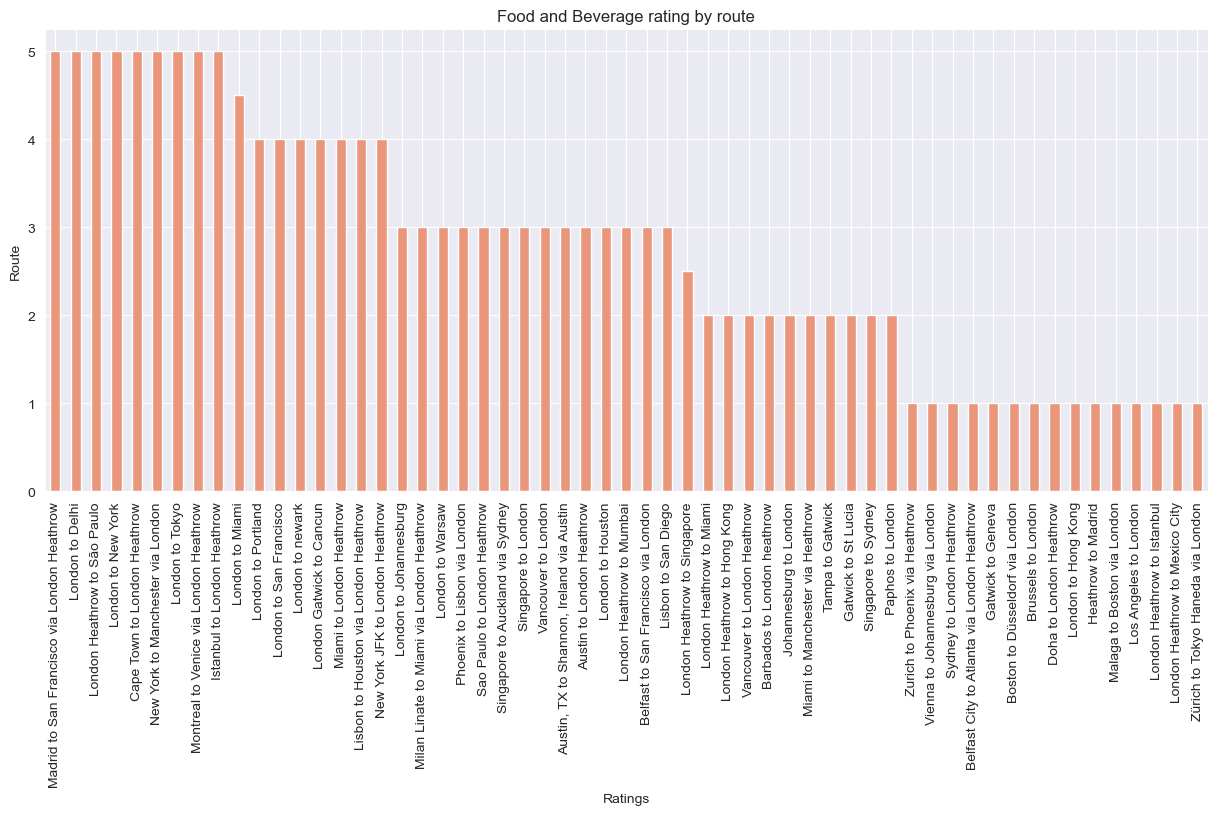

In [519]:
#Calculating the average for  60 rows from the top
average_rating_for_60_diff_routes = (df[:60].groupby('Route')['Food_&_Beverages']
                                     .mean().sort_values(ascending = False)
                                     .plot(kind = 'bar', color = 'darksalmon'))
plt.xlabel('Ratings')
plt.ylabel('Route')
plt.title('Food and Beverage rating by route')
plt.show()

**The graph shows some of the routes and the average rating, routes like London to Tokyo have the highest rating whilst routes like Los Angeles to London have the lowest rating**

##### o	How do food and beverage ratings impact the overall recommendation status?


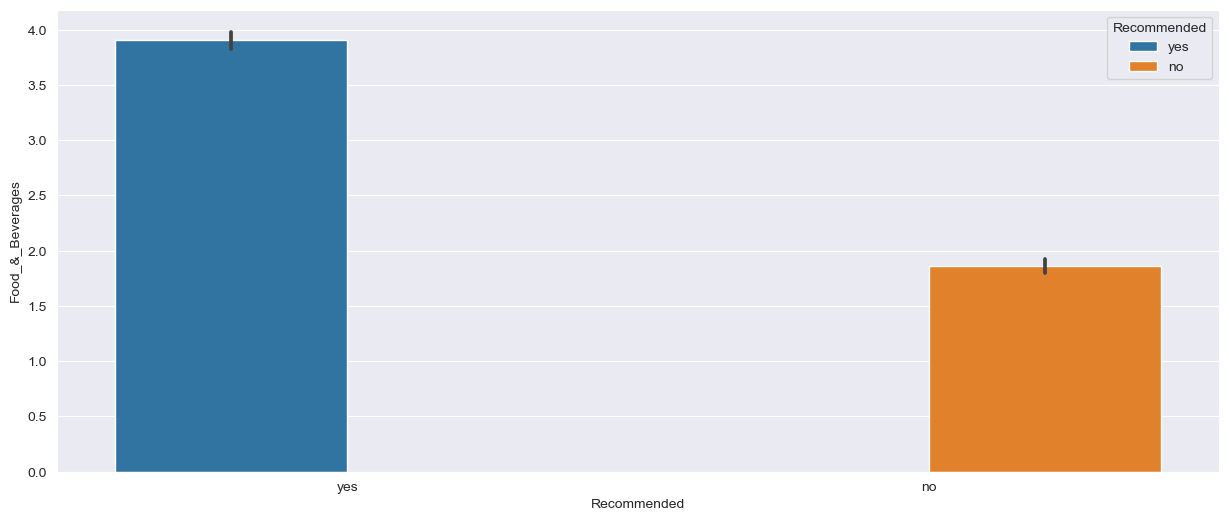

In [522]:
sns.barplot(data = df, x = 'Recommended',  y= 'Food_&_Beverages', hue = 'Recommended');

**The food and beverages category have more 'yes' which means it has a positive impact on the overall recommendation of the service**

##### o	How do inflight entertainment ratings differ by seat type (e.g., economy, business)?

In [525]:
#calculating inflight ratings by seat type
Inflight_Enter_Seat_type = ( df.groupby('Seat_Type')['Inflight_Entertainment']
                            .mean().round(2)
                            .sort_values(ascending = True))


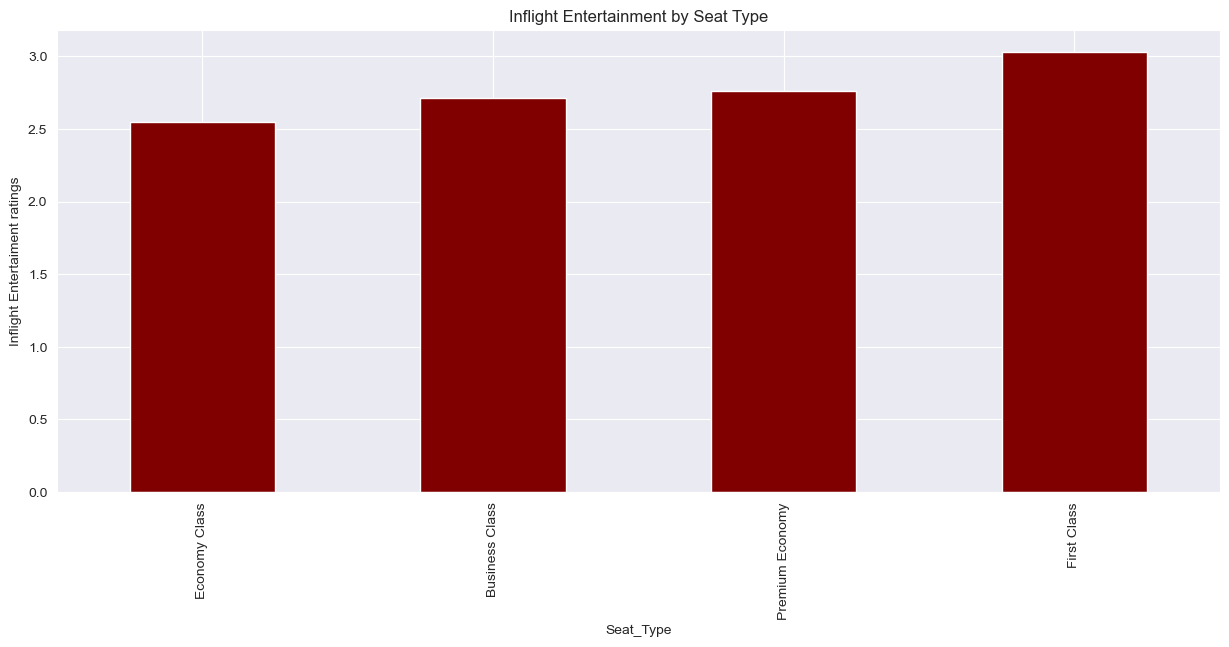

In [526]:
#visual presentation
Inflight_Enter_Seat_type.plot(kind= 'bar', color = 'maroon')
plt.title("Inflight Entertainment by Seat Type")
plt.ylabel('Inflight Entertaiment ratings');

**The first class has the highest average rating of 3 and the economy has the lowest rating of 2.5 on inflight entertainment**

### Recommendations:
##### o	What percentage of passengers would recommend the airline based on their flight experience?



In [529]:
Pass_Recommendation = df[df['overall_rating']> 2.5].shape[0]
percent = round(np.divide(Pass_Recommendation , df.shape[0]) * 100, 1)
print(f"About {percent} percent of paseengers would recommend the airline ")

About 52.0 percent of paseengers would recommend the airline 


##### o	What are the key factors influencing the recommendation status?

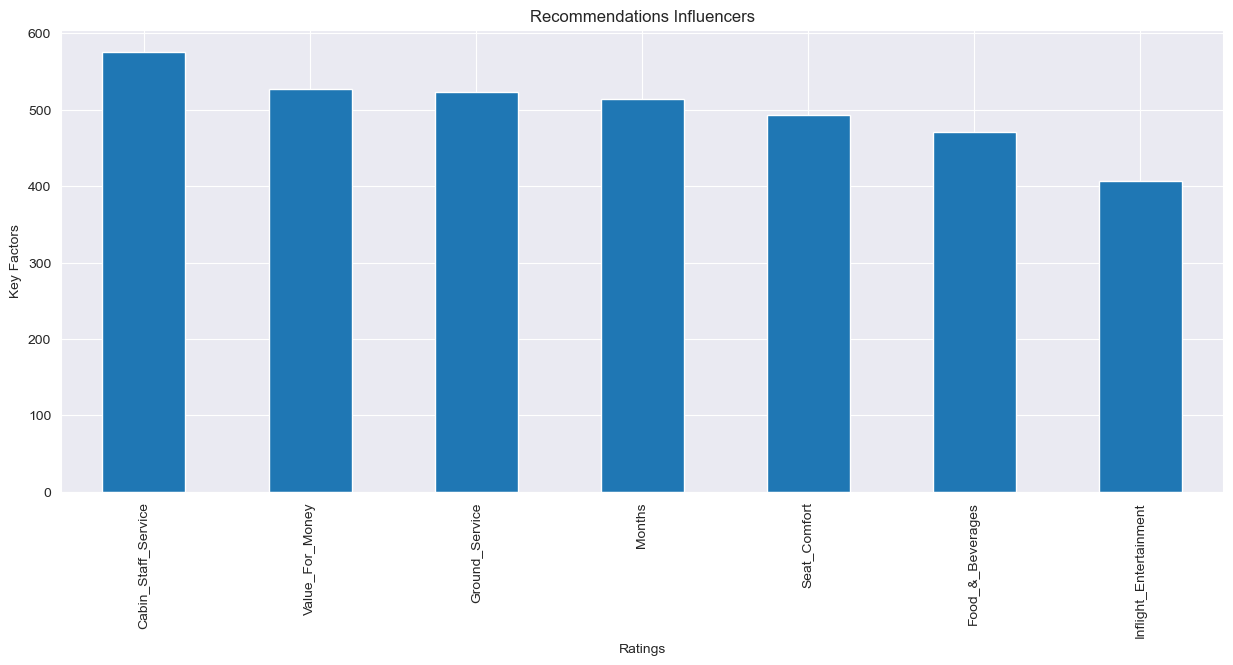

In [599]:
yes_recomm = ((df[df['Recommended']=='yes']
              .select_dtypes('number') >= 4)
              .drop(columns=[ 'Year', 'overall_rating'])
              .sum().sort_values(ascending = False)
              .plot(kind = 'bar'))
plt.xlabel('Ratings')
plt.ylabel('Key Factors')
plt.title('Recommendations Influencers');

**Cabin staff service has the highest total of ratings making it the major contributor to the positive recommendations followed by value for money and ground service**

### Trends Over Time:
##### o How have customer satisfaction ratings changed over time?



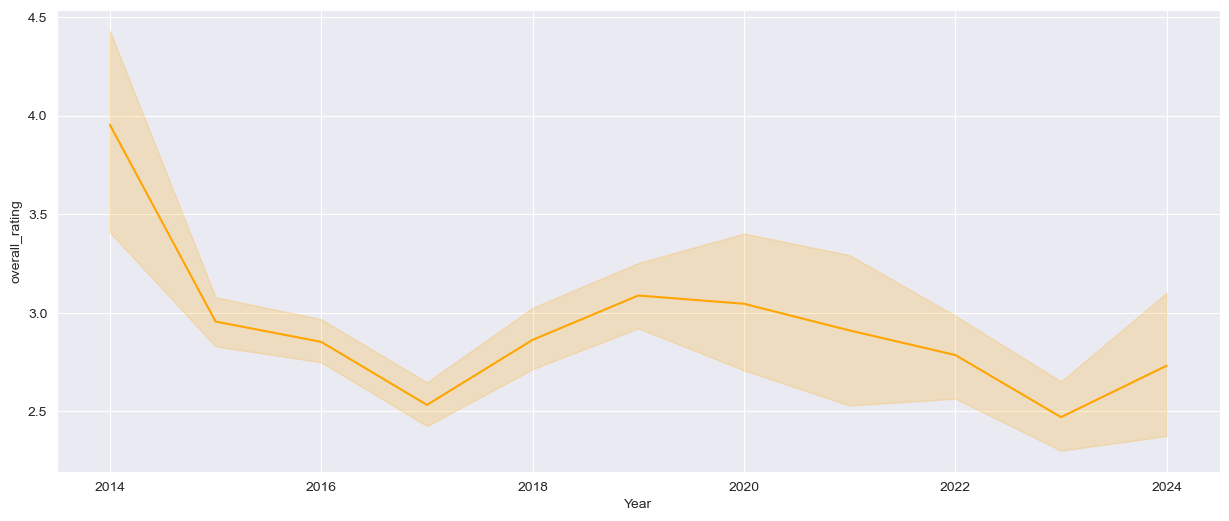

In [534]:
df['Year'] = df['Date_Flown'].dt.year
sns.lineplot(df,  x = 'Year' , y = 'overall_rating', color = 'orange');
plt.show()

**Ratings were at peak in 2014, dipped until 2017, rebounded in 2018, and then gradually declined until 2023. A new upward trend emerged in 2024.**

##### o Are there seasonal trends in ratings on the overall  flight experience?

In [537]:
#extracting months from date 
df['Months'] = df.Date_Flown.dt.month

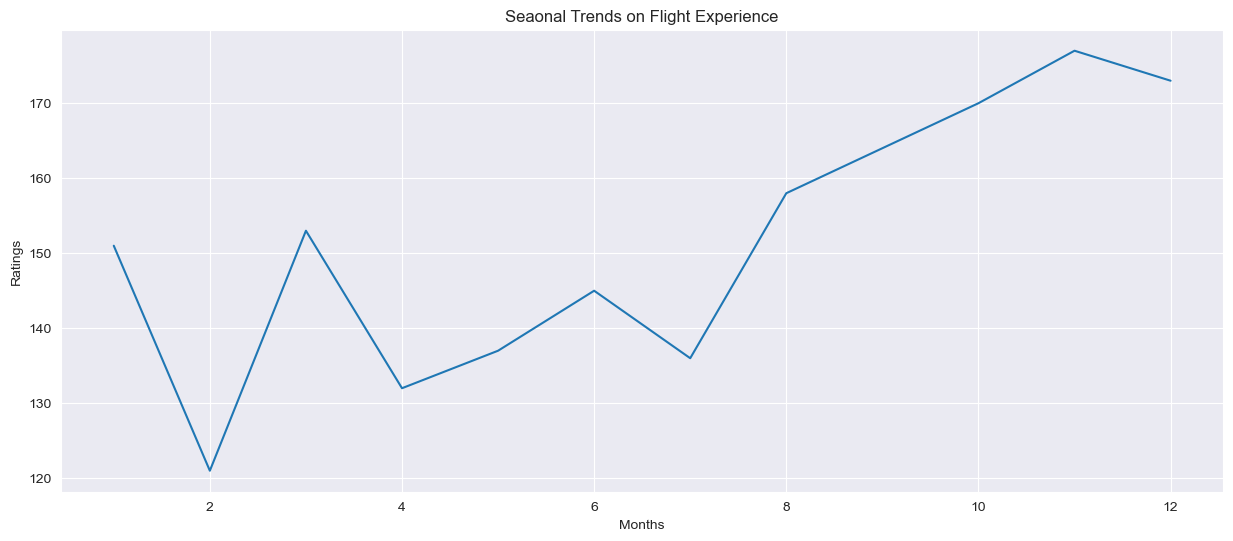

In [538]:
#cabin_staff = df.groupby('Months')['Cabin_Staff_Service'].count()
seasonal_rating = df.groupby('Months')['overall_rating'].count().plot()
plt.ylabel('Ratings')
plt.title('Seaonal Trends on Flight Experience')
plt.show();

**February marks the ratings low point, followed by a volatile period of ups and downs between March and July. However, a steady ascent begins in August, culminating in a peak in November, before declining again in December**

## ANALYSIS OBSERVATIONS AND RECOMMENDATIONS

_The business travellers category has the lowest rating_
* Survey or a follow up email on trip feedback to find out how business travellers dissatisfaction can be addressed

_Seat comfort and Cabin Staff Service have a high positive relation to overall satisfaction_
* With a correlation of 0.8, staff must focus on these two key areas to sustain high ratings and prevent decline. 

_The number of routes with a negative rating on food and beverages need to be reduced_
* Routes with ratings below 2.5 require immediate attention. Conduct in-house refresher training and awareness programs to enhance food and beverage quality, delivery, and options.

_Food and beverages contribute a lot to the recommendation of the airline_
* Urgent action is required to minimize ('No') recommendations, as they significantly work against  the airline's competitive edge

_Economy class inflight entertainment ratings are low_ 
* Experiment with diverse entertainment options and track ratings to identify improvements and boost passenger satisfaction

_With just 51% recommending our airline, the airline is at a  risky position_. 
* Regularly assess the impact of improvements to guarantee increased customer recommendations and avert reputational damage

_Customer satisfaction ratings have declined since 2014 (excluding the COVID-19 period)._
* To identify the root causes, there is need to conduct a further analysis of pre-2014 trends and compare them to current performance, pinpointing areas for improvement

_Seasonal ratings peak during the festive season but decline afterwards._
* To stay competitive, continuously monitor and optimize service delivery performance throughout the year, addressing weaknesses before competitors exploit them.

**By implementing these recommendations the airline will be in a postion to stay ahead of competition. Thank you for your time**